
<h2><center>Cassava Leaf Disease Classification. Data analysis and visualization.</center></h2>

<center><img src="https://storage.googleapis.com/kaggle-competitions/kaggle/13277/logos/header.png?t=2019-03-08-20-57-32"></center>

### This competition will challenge you to distinguish between several diseases that cause material harm to the food supply of many African countries. In some cases the main remedy is to burn the infected plants to prevent further spread, which can make a rapid automated turnaround quite useful to the farmers.

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0' role="tab" aria-controls="home"><center>Quick navigation</center></h3>

* [1. train.csv](#1)
* [2. Image samples](#2)
* [3. Image size analysis](#3)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import json

import matplotlib.pyplot as plt
import cv2

/kaggle/input/cassava-leaf-disease-classification/sample_submission.csv
/kaggle/input/cassava-leaf-disease-classification/label_num_to_disease_map.json
/kaggle/input/cassava-leaf-disease-classification/train.csv
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train14-1338.tfrec
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train13-1338.tfrec
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train04-1338.tfrec
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train01-1338.tfrec
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train08-1338.tfrec
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train00-1338.tfrec
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train10-1338.tfrec
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train02-1338.tfrec
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train15-1327.tf

<a id="1"></a>
<h2 style='background:black; border:0; color:white'><center>1. train.csv</center><h2>

**train.csv**

* image_id the image file name.

* label the ID code for the disease.

In [2]:
train = pd.read_csv("../input/cassava-leaf-disease-classification/train.csv")
train

image_id  label
0      1000015157.jpg      0
1      1000201771.jpg      3
2       100042118.jpg      1
3      1000723321.jpg      1
4      1000812911.jpg      3
...               ...    ...
21392   999068805.jpg      3
21393   999329392.jpg      3
21394   999474432.jpg      1
21395   999616605.jpg      4
21396   999998473.jpg      4

[21397 rows x 2 columns]

In [3]:
ds = train['label'].value_counts().reset_index()
ds.columns = [
    'label', 
    'percent'
]
ds['percent'] /= len(train)

fig = px.pie(
    ds, 
    names='label', 
    values='percent', 
    title='Diseases distribution', 
    width=800,
    height=500 
)

fig.show()

**label_num_to_disease_map.json** The mapping between each disease code and the real disease name.

In [4]:
with open("../input/cassava-leaf-disease-classification/label_num_to_disease_map.json") as f:
    map_dis = json.loads(f.read())

print(json.dumps(map_dis, indent=4))

{
    "0": "Cassava Bacterial Blight (CBB)",
    "1": "Cassava Brown Streak Disease (CBSD)",
    "2": "Cassava Green Mottle (CGM)",
    "3": "Cassava Mosaic Disease (CMD)",
    "4": "Healthy"
}


So we can see that the most popular disease is "Cassava Mosaic Disease (CMD)".

**Cassava mosaic disease (CMD)** is primarily spread through the dissemination of stem cuttings (A) obtained from cassava plants affected by the disease. Secondary spread can occur within and between fields through the activities of the whitefly vector Bemisia tabaci (B).

**[train/test]_images the image files.** The full set of test images will only be available to your notebook when it is submitted for scoring. Expect to see roughly 15,000 images in the test set.

<a id="2"></a>
<h2 style='background:black; border:0; color:white'><center>2. Image samples</center><h2>

**Healthy**

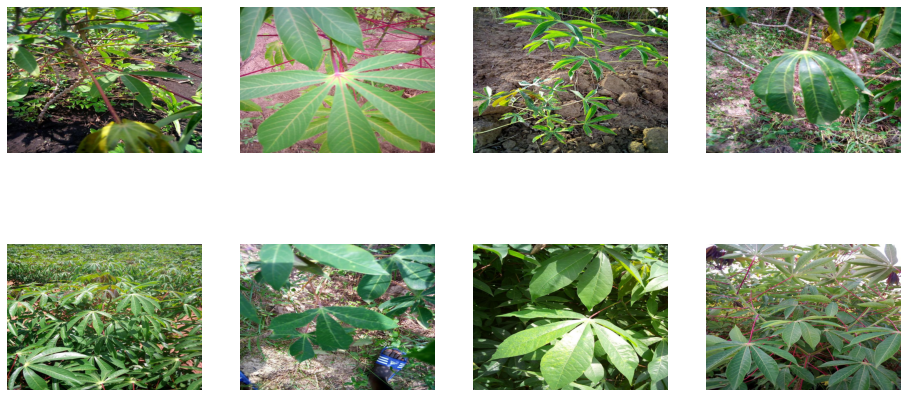

In [5]:
plt.figure(figsize=(16, 8))
df = train[train["label"] == 4].sample(8)
for ind, (_id, row) in enumerate(df.iterrows()):
    image_id = row["image_id"]
    plt.subplot(2, 4, ind + 1)
    image = cv2.imread(os.path.join("../input/cassava-leaf-disease-classification/train_images", image_id))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.imshow(image)
    plt.axis("off")

**Cassava Mosaic Disease (CMD)**

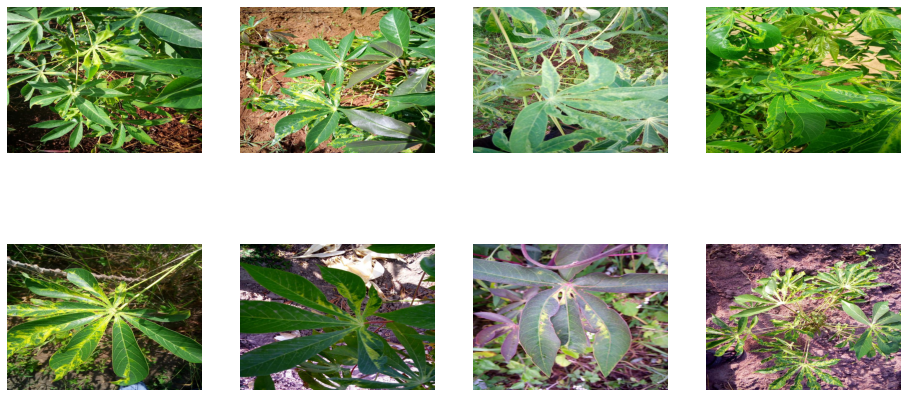

In [6]:
plt.figure(figsize=(16, 8))
df = train[train["label"] == 3].sample(8)
for ind, (_id, row) in enumerate(df.iterrows()):
    image_id = row["image_id"]
    plt.subplot(2, 4, ind + 1)
    image = cv2.imread(os.path.join("../input/cassava-leaf-disease-classification/train_images", image_id))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.imshow(image)
    plt.axis("off")

**Cassava Green Mottle (CGM)**

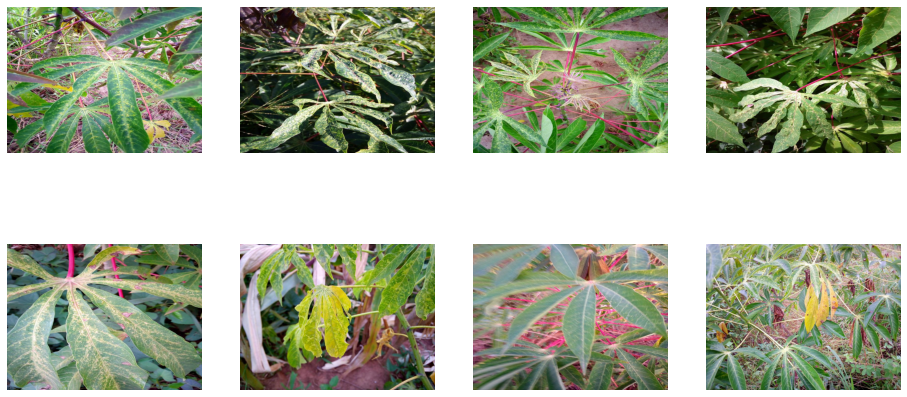

In [7]:
plt.figure(figsize=(16, 8))
df = train[train["label"] == 2].sample(8)
for ind, (_id, row) in enumerate(df.iterrows()):
    image_id = row["image_id"]
    plt.subplot(2, 4, ind + 1)
    image = cv2.imread(os.path.join("../input/cassava-leaf-disease-classification/train_images", image_id))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.imshow(image)
    plt.axis("off")

**Cassava Brown Streak Disease (CBSD)**

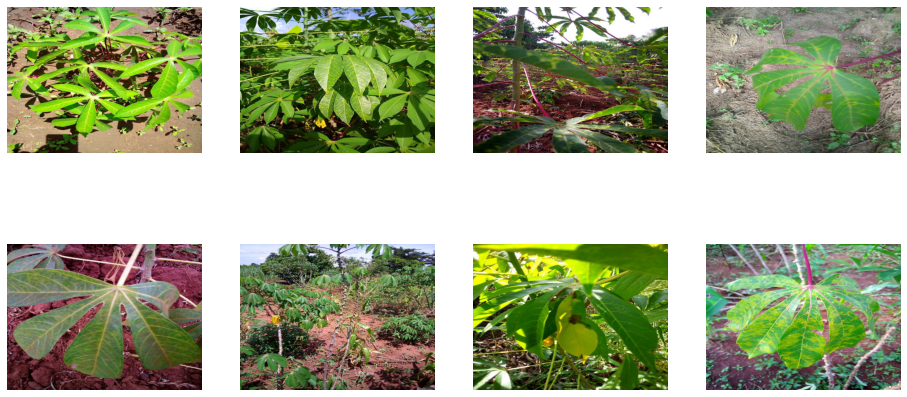

In [8]:
plt.figure(figsize=(16, 8))
df = train[train["label"] == 1].sample(8)
for ind, (_id, row) in enumerate(df.iterrows()):
    image_id = row["image_id"]
    plt.subplot(2, 4, ind + 1)
    image = cv2.imread(os.path.join("../input/cassava-leaf-disease-classification/train_images", image_id))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.imshow(image)
    plt.axis("off")

**Cassava Bacterial Blight (CBB)**

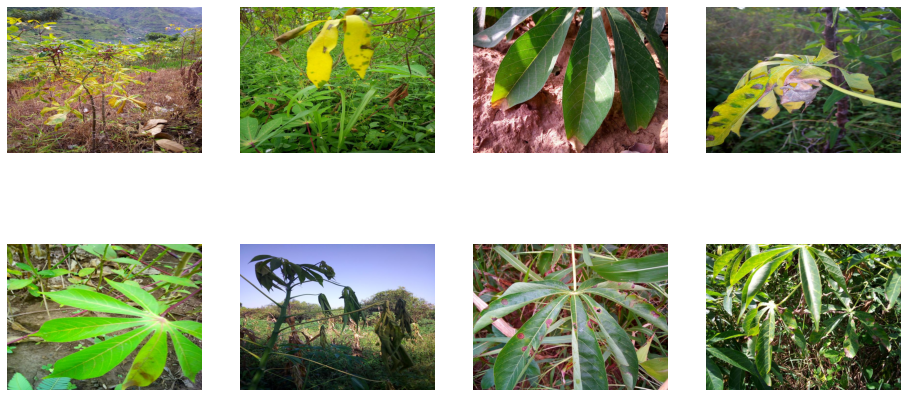

In [9]:
plt.figure(figsize=(16, 8))
df = train[train["label"] == 0].sample(8)
for ind, (_id, row) in enumerate(df.iterrows()):
    image_id = row["image_id"]
    plt.subplot(2, 4, ind + 1)
    image = cv2.imread(os.path.join("../input/cassava-leaf-disease-classification/train_images", image_id))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.imshow(image)
    plt.axis("off")

<a id="3"></a>
<h2 style='background:black; border:0; color:white'><center>3. Image size analysis</center><h2>

In [10]:
%time

check_dict = dict()
directory = '/kaggle/input/cassava-leaf-disease-classification/train_images/' 

for filename in os.listdir(directory):
    img = cv2.imread(directory + filename)
    try:
        check_dict[img.shape] += 1
    except:
        check_dict[img.shape] = 1


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


In [11]:
check_dict

{(600, 800, 3): 21397}

### Work in progress